# Face recognition with ORL

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from utils import load_dataset, image_width, image_height, rotate_image
from scipy import misc, ndimage

plt.gray()

In [4]:
# Loading the ORL faces dataset
train_X_origin, train_Y, test_X_origin, test_Y = load_dataset()

print ("train_X shape: " + str(train_X_origin.shape))
print ("train_Y shape: " + str(train_Y.shape))
print ("test_X shape: " + str(test_X_origin.shape))
print ("test_Y shape: " + str(test_Y.shape))

train_X shape: (320, 92, 112, 1)
train_Y shape: (320, 1)
test_X shape: (80, 92, 112, 1)
test_Y shape: (80, 1)


Original Image:  (112, 92)


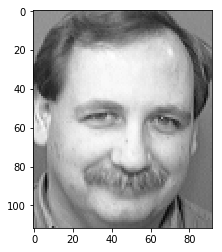

Rotated Image:  (112, 92)


/home/eugene/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:616: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


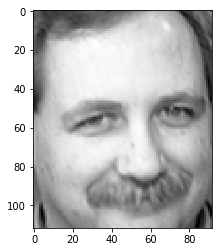

Done


In [5]:
# demonstration(train_X[35], 10)

image = train_X_origin[30].reshape(image_height, image_width)
angle = 10

image_orig = np.copy(image)
image_height, image_width = image_orig.shape[0:2]

print("Original Image: ", image.shape)
plt.imshow(image)
plt.show()
image_rotated = rotate_image(image, angle)
print("Rotated Image: ", image_rotated.shape)
plt.imshow(image_rotated)
plt.show()

# print("dscfdscdsc 111: ", int((image_height-image_rotated.shape[0])/2))

# image_size = ndimage.zoom(image_rotated, 1.39)[int((image_height-image_rotated.shape[0])/2):image_height + int((image_height-image_rotated.shape[0])/2), :]
# print("Rotated Image 111: ", image_size.shape)
# plt.imshow(image_size)
# plt.show()

print("Done")

In [6]:
# Let's standardize our dataset.
train_X_normalized = train_X_origin/255.
test_X_normalized = test_X_origin/255.

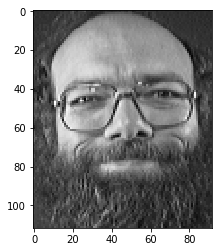

In [7]:
# Example of a picture
index = 31
plt.imshow(train_X_normalized[index].reshape(image_height, image_width))
plt.show()

In [8]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    v = image.reshape(image.shape[0], -1)

    return v

In [9]:
# Reshape the training and test examples so that images of size (92, 112, 1) are flattened into single vectors
train_X = image2vector(train_X_normalized) 
test_X = image2vector(test_X_normalized) 
print ("flattened train_X: " + str(train_X.shape))
print ("flattened test_X: " + str(test_X.shape))

flattened train_X: (320, 10304)
flattened test_X: (80, 10304)


In [10]:
#Euclidean distance between 2-dimensional point
def find_euclidean_distance(A, B):
    return np.sqrt(np.sum((A - B)**2))

In [12]:
distance = find_euclidean_distance(train_X[0:1], test_X[0:1])
print("Euclidean distance between first rows: ", distance)

Euclidean distance between first rows:  13.10218


In [24]:
def classify(train_data, train_labels, testData, numberOfClasses, k = 1):
    #Euclidean distance between 2-dimensional point
    test_labels = []
    for testPoint in testData:
        #Claculate distances between test point and all of the train points
        testDist = [ [find_euclidean_distance(testPoint, train_data[i]), train_labels[i][0]] for i in range(train_data.shape[0])]
        #How many points of each class among nearest K
        stat = [0 for i in range(numberOfClasses)]
        
        for d in sorted(testDist)[0:k]:
            stat[d[1]] += 1.0
        #Assign a class with the most number of occurences among K nearest neighbours
        test_labels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    return test_labels

In [25]:
predicted_Y = classify(train_X, train_Y, test_X, 40)

In [26]:
print(np.array(predicted_Y))
print(np.reshape(test_Y, (1, 80))[0])

[13 35 39 26 32 20  8 12 34 36  9  8 26 11 29  5 32 25 35  4 10 36 27 35
  3  5 34 12 29  2 18 16 15 24 20  3  3 12 18 37 28 36 14 28 37 17  9 33
 33 19 24 11 26  7 33  2 16 33 38 17 38  3 19 31  8  7  8 29 24 27 21  0
 35 19 25 32 19 11  4 17]
[13 35 39 26 32 20  8 12 34 36  9  8 26 11 29  5 32 25 35  4 10 36 27 35
  3  5 34 12 29  2 18 16 15 24 20  3  3 12 18 37 28 36 14 28 37 17  9 33
 33 19 24 11 26  7 33  2 16 33 38 17 38  3 19 31  8  7  8 29 24 27 21  0
 35 19 25 32 19 11  4 17]


In [27]:
print ("Accuracy: ", (np.array(predicted_Y) == np.reshape(test_Y, (1, 80))[0]).mean())

Accuracy:  1.0
